# Author : Biswajit Dutta

## Tecnical Task 3 : Exploratory Data Analysis - Retail (Level - Beginner)


##### In this , We will perform 'Exploratory Data Analysis' on dataset - ‘SampleSuperstore’. As a business manager , we will try to find out the weak areas where you can work to make more profit . Also , What all business problems can derive by exploring the data .

### Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *
import warnings
warnings.filterwarnings('ignore')

### Importing the dataset

In [3]:
data=pd.read_csv("C:/Users/hp/OneDrive/Desktop/SampleSuperstore.csv")

### Reading the dataset

In [4]:
data.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [4]:
#Checking the dataset dimension

data.shape

(9994, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### This function computes a summary of statistics to the DataFrame columns.
#### Here are few observation we can make form this:
####    1.In sales and profit ,the difference between max and 75% values quite high which indicates outliers in the dataset.

In [6]:
data['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [7]:
data['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

#### Following conclustions we can make for categorical variables: 
#### 1. 4 types of shipping mode.
#### 2. 3 types of segments of people.

## Univariate Analysis

In [7]:
data['Segment'].value_counts().reset_index()


,index,Segment
0,Consumer,5191
1,Corporate,3020
2,Home Office,1783


In [8]:
seg=(data['Segment'].value_counts()/len(data['Segment'])*100).reset_index().sort_values('Segment',ascending=False)
seg

,index,Segment
0,Consumer,51.941165
1,Corporate,30.218131
2,Home Office,17.840704


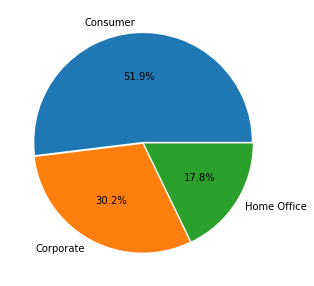

In [9]:
plt.figure(figsize=(5,5))
labels=('Consumer','Corporate','Home Office')
explode=(0.01,0.01,0.01)
plt.pie(seg['Segment'],explode=explode,labels=labels,autopct='%1.1f%%')
plt.show()

### Following conclustions can be made from the Pie Chart :
#### 1. 50% people belongs to Consumer segment.
#### 2. 20%-30% people belongs to Corporate and Home Office segment .

In [10]:
data['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [11]:
sm=(data['Ship Mode'].value_counts()/len(data['Ship Mode'])*100).reset_index().sort_values('Ship Mode',ascending=False)
sm

,index,Ship Mode
0,Standard Class,59.715829
1,Second Class,19.461677
2,First Class,15.389234
3,Same Day,5.433260


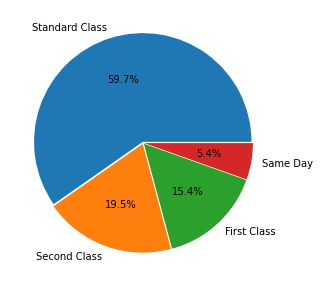

In [12]:
plt.figure(figsize=(5,5))
labels=sm['index']
explode=(0.01,0.01,0.01,0.01)
plt.pie(sm['Ship Mode'],explode=explode,labels=labels,autopct='%1.1f%%')
plt.show()

### conclustions can be made from the Pie Chart :
#### 1. Most of deleveries belongs to Standard Class.(Around 60%)
#### 2. very less % of deleveries on the Same Day.

## Now, Analysing Category of items in the Superstore.

In [ ]:
cg=(data['Category'].value_counts()/len(data['Category'])*100).reset_index().sort_values('Category',ascending=False)
cg

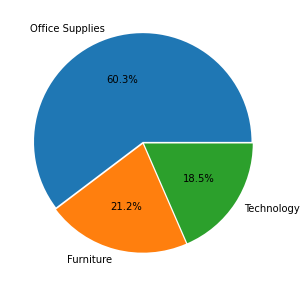

In [14]:
plt.figure(figsize=(5,5))
labels=cg['index']
explode=(0.01,0.01,0.01)
plt.pie(cg['Category'],explode=explode,labels=labels,autopct='%1.1f%%')
plt.show()

### conclustions can be made from the Pie Chart :
#### 1. Most of the category belongs to Office Supplies in superstore.
#### 2. 20% - 30%  under Furniture and Technology.

## Analysing Sub-Category of items in the superstore

<AxesSubplot:>

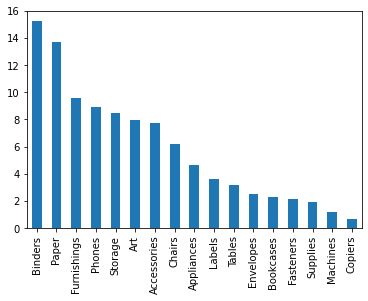

In [15]:
((data['Sub-Category'].value_counts())/len(data['Sub-Category'])*100).plot(kind='bar')   #17

### conclustions can be made from the Histogram :
##### 1. 9%-15% falls under Office Supplies.
##### 2. 2%-8% belongs to Furniture and Technology.

## Bivariate Analysis

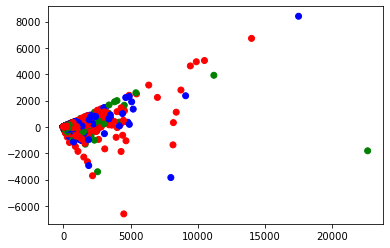

In [16]:
fig,ax=plt.subplots()
colors={'Consumer':'red','Corporate':'blue','Home Office':'green'}
ax.scatter(data['Sales'],data['Profit'],c=data['Segment'].apply(lambda x: colors[x]))
plt.show()

#### From the above plot ,We can say that there is more profit in consumer segment.

#### Drop some useless data

In [17]:
dat=data.drop(['Postal Code','Country'],axis=1)

In [18]:
dat.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### Now,Cecking correlation all variable

In [19]:
cor=dat.corr()
cor

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


<AxesSubplot:>

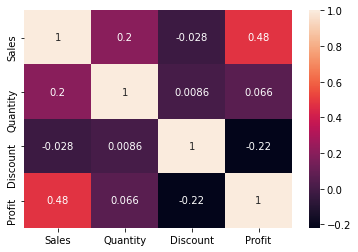

In [20]:
sns.heatmap(cor,annot=True)

##### Above the heat map from we conclude that , Sales vs Discount and Profit Vs Discount be negatively corelative , 
##### that's means their are no relation if we made a good relation between then that's help's business profit.
#### Now we focusing on Discount variable.

In [21]:
data.pivot_table(values='Sales',index='Segment',columns='Discount',aggfunc='median')

Discount,0.00,0.10,0.15,0.20,0.30,0.32,0.40,0.45,0.50,0.60,0.70,0.80
Segment,,,,,,,,,,,,
Consumer,51.900,365.598,307.666,51.540,361.011,328.3992,289.404,353.24025,292.100,23.526,12.051,8.568
Corporate,58.580,245.646,480.165,52.184,347.361,307.6660,338.679,562.29250,302.450,21.936,12.060,9.264
Home Office,49.645,191.646,411.332,52.680,362.901,341.9992,212.856,427.23725,433.935,22.608,12.957,8.769


In [22]:
data.pivot_table(values='Profit',index='Segment',columns='Discount',aggfunc='median')

Discount,0.00,0.10,0.15,0.20,0.30,0.32,0.40,0.45,0.50,0.60,0.70,0.80
Segment,,,,,,,,,,,,
Consumer,16.1240,62.0390,5.12940,6.0433,-26.0562,-30.0980,-47.21360,-135.68145,-175.2600,-14.1323,-8.7276,-13.7175
Corporate,16.2688,46.7908,26.27735,6.7054,-28.2240,-59.0606,-87.27495,-255.58750,-120.5130,-10.4196,-8.9796,-16.3800
Home Office,15.4546,37.2300,16.79860,7.2576,-18.2040,-57.3234,-49.71900,-175.14690,-237.8425,-14.2290,-9.7608,-14.0328


#### From the pivot table , 
##### i) Discount more than 30% superstore facing losses.
#### ii) if discount 10%-20% that will be hlep business profit.

<AxesSubplot:ylabel='Frequency'>

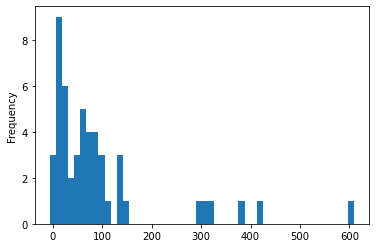

In [23]:
temp_dat1=data.loc[(data['Segment']=='Consumer')&(data['Discount']==0.10)]
temp_dat1['Profit'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

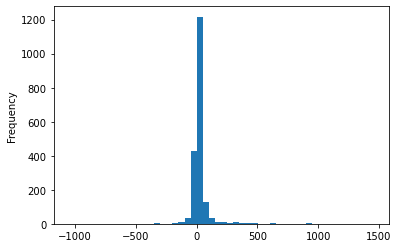

In [24]:
temp_dat2=data.loc[(data['Segment']=='Consumer')&(data['Discount']==0.2)]
temp_dat2['Profit'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

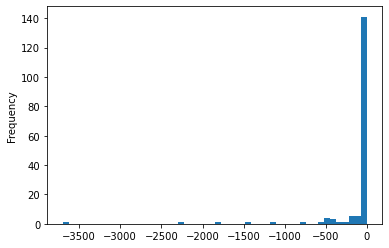

In [25]:
temp_dat3=data.loc[(data['Segment']=='Consumer')&(data['Discount']==0.80)]
temp_dat3['Profit'].plot.hist(bins=50)

#### From the above Histogram plots we say , Discount between 10%and 20% 0n consumer segment  that's helps increasing business profit.

<AxesSubplot:ylabel='Frequency'>

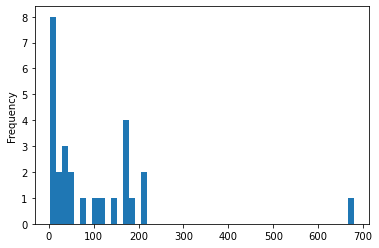

In [26]:
temp_dat4=data.loc[(data['Segment']=='Corporate')&(data['Discount']==0.10)]
temp_dat4['Profit'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

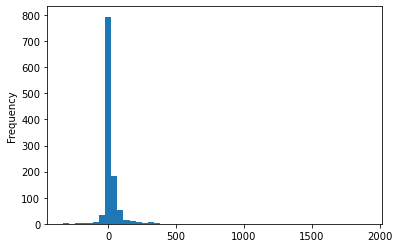

In [27]:
temp_dat5=data.loc[(data['Segment']=='Corporate')&(data['Discount']==0.20)]
temp_dat5['Profit'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

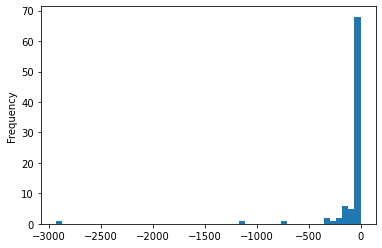

In [28]:
temp_dat6=data.loc[(data['Segment']=='Corporate')&(data['Discount']==0.80)]
temp_dat6['Profit'].plot.hist(bins=50)

#### From the above Histogram plots we say , Discount between 10%and 20% 0n Corporate segment  that's helps increasing business profit.

<AxesSubplot:ylabel='Frequency'>

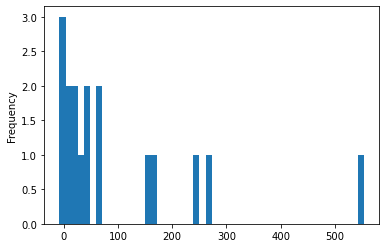

In [29]:
temp_dat7=data.loc[(data['Segment']=='Home Office')&(data['Discount']==0.10)]
temp_dat7['Profit'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

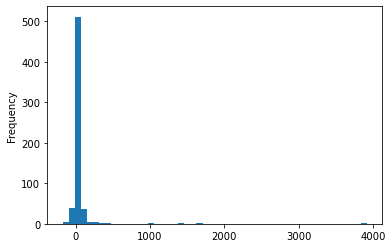

In [30]:
temp_dat8=data.loc[(data['Segment']=='Home Office')&(data['Discount']==0.20)]
temp_dat8['Profit'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

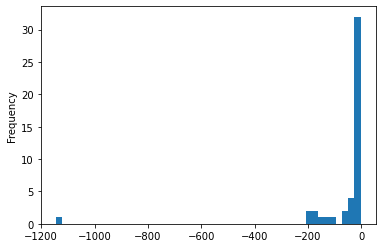

In [31]:
temp_dat9=data.loc[(data['Segment']=='Home Office')&(data['Discount']==0.80)]
temp_dat9['Profit'].plot.hist(bins=50)

#### From the above Histogram plots we say , Discount between 10%and 20% 0n all segment that's helps increasing business profit.

<AxesSubplot:ylabel='Frequency'>

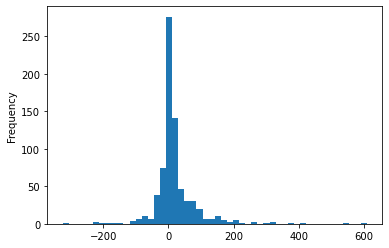

In [32]:
temp_dc1=data.loc[(data['Category']=='Furniture')&(data['Discount']>=0.10)&(data['Discount']<=0.20)]
temp_dc1['Profit'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

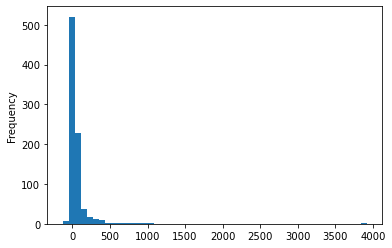

In [33]:
temp_dc2=data.loc[(data['Category']=='Technology')&(data['Discount']>=0.10)&(data['Discount']<=0.20)]
temp_dc2['Profit'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

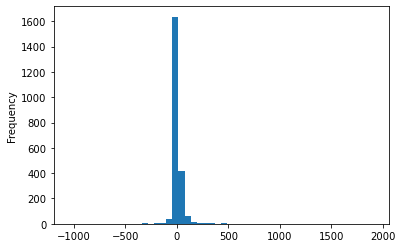

In [34]:
temp_dc3=data.loc[(data['Category']=='Office Supplies')&(data['Discount']>=0.10)&(data['Discount']<=0.20)]
temp_dc3['Profit'].plot.hist(bins=50)

#### From the above Histogram plots we say , Discount between 10% and 20% 0n all Category that's helps increasing business profit.

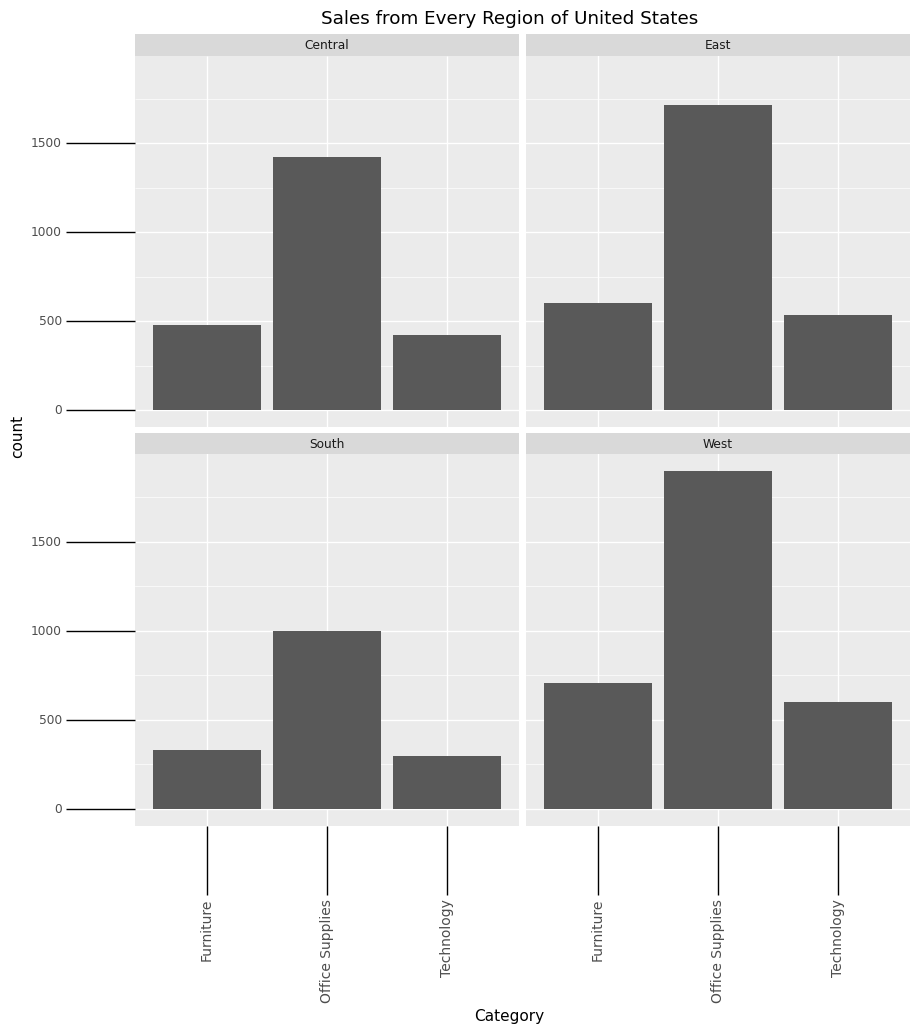

<ggplot: (142530369479)>

In [38]:
flip_xlabels=theme(axis_text_x=element_text(angle=90,hjust=10),figure_size=(10,10),
                   axis_ticks_length_major=50,axis_ticks_length_minor=50)
(ggplot(dat,aes(x='Category',fill='Sales'))+ geom_bar()+theme(axis_text_x=element_text(size=10))
+facet_wrap(['Region'])+flip_xlabels+ggtitle("Sales from Every Region of United States"))

### Above the Histogram plots, if we make more sales central and south part of United States that's helps our business making more profit.

# Thank you !!!!